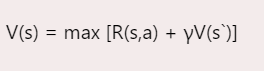

### Dataset creation

In [3]:
import pandas as pd
import random

def generate_score():
  return random.randint(0, 200)

data = []

# Generate data for 5000 rows
for i in range(5000):
  query = f"Q{i+1}"
  score = generate_score()
  attack = 1 if score > 100 else 0
  data.append({"query": query, "score": score, "attack": attack})

df = pd.DataFrame(data)

df

,query,score,attack
0,Q1,73,0
1,Q2,38,0
2,Q3,128,1
3,Q4,179,1
4,Q5,173,1
...,...,...,...
4995,Q4996,82,0
4996,Q4997,190,1
4997,Q4998,59,0
4998,Q4999,129,1


In [4]:
# saving the dataframe
df.to_csv('file1.csv')

# reward_function_1

### Defining reward function in simple range

In [1]:
import pandas as pd

df = pd.read_csv('file1.csv')

alpha = 0.10

def rewardget(score):
    if score >= 0 and score <= 19:
        return 50
    elif score >= 20 and score <= 39:
        return 40
    elif score >= 40 and score <= 59:
        return 30
    elif score >= 60 and score <= 79:
        return 20
    elif score >= 80 and score <= 99:
        return 10
    elif score == 100:
        return 0
    elif score >= 101 and score <= 120:
        return -10
    elif score >= 121 and score <= 140:
        return -20
    elif score >= 141 and score <= 160:
        return -30
    elif score >= 161 and score <= 180:
        return -40
    elif score >= 181 and score <= 200:
        return -50

def valuefind(reward, previousValue):
    currentValue = reward + alpha * previousValue
    return currentValue

currentValues = []
previousValue = 0

for i in range(len(df)):
    score = df.loc[i, 'score']
    reward = rewardget(score)
    currentValue = valuefind(reward, previousValue)
    currentValues.append(currentValue)
    previousValue = currentValue

# Append 'currentValues' as a new column to the DataFrame
df['currentValues'] = currentValues

df.head(20)


,Unnamed: 0,query,score,attack,currentValues
0,0,Q1,73,0,20.000000
1,1,Q2,38,0,42.000000
2,2,Q3,128,1,-15.800000
3,3,Q4,179,1,-41.580000
4,4,Q5,173,1,-44.158000
5,5,Q6,91,0,5.584200
6,6,Q7,182,1,-49.441580
7,7,Q8,200,1,-54.944158
8,8,Q9,15,0,44.505584
9,9,Q10,84,0,14.450558


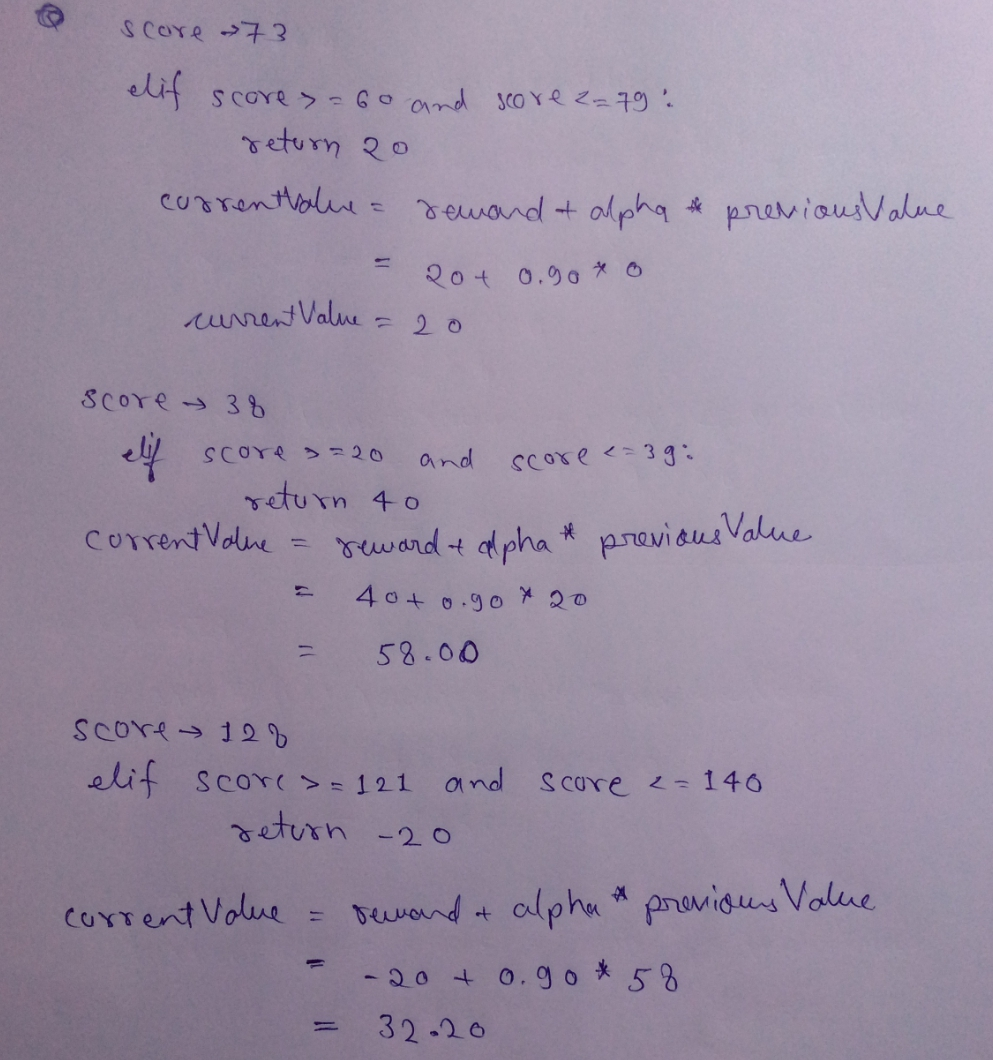

# reward_function_2

### Defining reward function with 10 previousValue consider

In [2]:
import pandas as pd

df = pd.read_csv('file1.csv')

alpha = 0.10
previousValues = []

def rewardget(score, previousValues):
    previousValues_mean = sum(previousValues[-10:]) / len(previousValues[-10:]) if previousValues else 0
    if score >= 0 and score <= 19:
        reward = 50 - (previousValues_mean / 10)
    elif score >= 20 and score <= 39:
        reward = 40 - (previousValues_mean / 10)
    elif score >= 40 and score <= 59:
        reward = 30 - (previousValues_mean / 10)
    elif score >= 60 and score <= 79:
        reward = 20 - (previousValues_mean / 10)
    elif score >= 80 and score <= 99:
        reward = 10 - (previousValues_mean / 10)
    elif score == 100:
        reward = 0 - (previousValues_mean / 10)
    elif score >= 101 and score <= 120:
        reward = -10 - (previousValues_mean / 10)
    elif score >= 121 and score <= 140:
        reward = -20 - (previousValues_mean / 10)
    elif score >= 141 and score <= 160:
        reward = -30 - (previousValues_mean / 10)
    elif score >= 161 and score <= 180:
        reward = -40 - (previousValues_mean / 10)
    elif score >= 181 and score <= 200:
        reward = -50 - (previousValues_mean / 10)
    return reward

def valuefind(reward, previousValue):
    currentValue = reward + alpha * previousValue
    return currentValue

currentValues = []
previousValue = 0

for i in range(len(df)):
    score = df.loc[i, 'score']
    reward = rewardget(score, previousValues)
    currentValue = valuefind(reward, previousValue)
    currentValues.append(currentValue)
    previousValues.append(currentValue)
    previousValue = currentValue

# Append 'currentValues' as a new column to the DataFrame
df['currentValues'] = currentValues

df.head(20)

,Unnamed: 0,query,score,attack,currentValues
0,0,Q1,73,0,20.000000
1,1,Q2,38,0,40.000000
2,2,Q3,128,1,-19.000000
3,3,Q4,179,1,-43.266667
4,4,Q5,173,1,-44.270000
5,5,Q6,91,0,6.503733
6,6,Q7,182,1,-48.682411
7,7,Q8,200,1,-53.600879
8,8,Q9,15,0,46.418865
9,9,Q10,84,0,15.707413


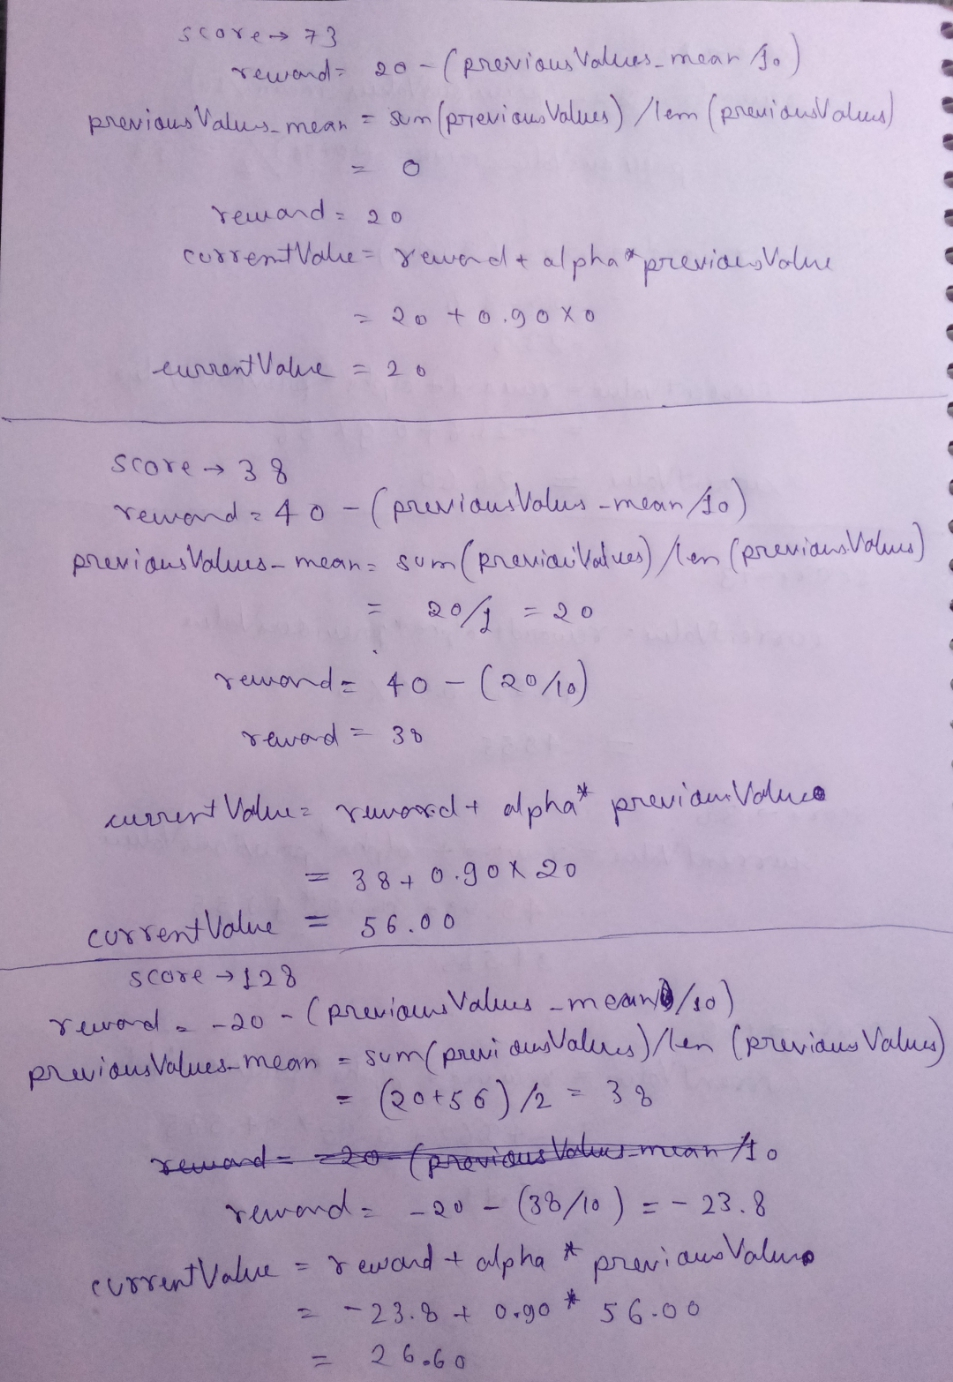

# reward_function_3

### Defining reward function with 10 previousValue consider with abs(current_score - prev_score) > 100 then currentValue = 2 * reward + alpha * previousValue instead of currentValue = reward + alpha * previousValue

In [3]:
import pandas as pd

df = pd.read_csv('file1.csv')

alpha = 0.10
previousValues = []

def rewardget(score, previousValues):
    previousValues_mean = sum(previousValues[-10:]) / len(previousValues[-10:]) if previousValues else 0
    if score >= 0 and score <= 19:
        reward = 50 - (previousValues_mean / 10)
    elif score >= 20 and score <= 39:
        reward = 40 - (previousValues_mean / 10)
    elif score >= 40 and score <= 59:
        reward = 30 - (previousValues_mean / 10)
    elif score >= 60 and score <= 79:
        reward = 20 - (previousValues_mean / 10)
    elif score >= 80 and score <= 99:
        reward = 10 - (previousValues_mean / 10)
    elif score == 100:
        reward = 0 - (previousValues_mean / 10)
    elif score >= 101 and score <= 120:
        reward = -10 - (previousValues_mean / 10)
    elif score >= 121 and score <= 140:
        reward = -20 - (previousValues_mean / 10)
    elif score >= 141 and score <= 160:
        reward = -30 - (previousValues_mean / 10)
    elif score >= 161 and score <= 180:
        reward = -40 - (previousValues_mean / 10)
    elif score >= 181 and score <= 200:
        reward = -50 - (previousValues_mean / 10)
    return reward

def valuefind(reward, previousValue, prev_score, current_score):
    if abs(current_score - prev_score) > 100:
        currentValue = 2 * reward + alpha * previousValue
    else:
        currentValue = reward + alpha * previousValue
    return currentValue

currentValues = []
previousValue = 0
prev_score = df.loc[0, 'score']  # Initialize prev_score with the first score in the dataframe

for i in range(len(df)):
    score = df.loc[i, 'score']
    reward = rewardget(score, previousValues)
    currentValue = valuefind(reward, previousValue, prev_score, score)
    currentValues.append(currentValue)
    previousValues.append(currentValue)
    previousValue = currentValue
    prev_score = score

# Append 'currentValues' as a new column to the DataFrame
df['currentValues'] = currentValues

df.head(20)

,Unnamed: 0,query,score,attack,currentValues
0,0,Q1,73,0,20.000000
1,1,Q2,38,0,40.000000
2,2,Q3,128,1,-19.000000
3,3,Q4,179,1,-43.266667
4,4,Q5,173,1,-44.270000
5,5,Q6,91,0,6.503733
6,6,Q7,182,1,-48.682411
7,7,Q8,200,1,-53.600879
8,8,Q9,15,0,98.197818
9,9,Q10,84,0,20.309986


# reward_function_4

### Defining reward function using hyperbolic tangent function (tanh)

In [4]:
import pandas as pd

df = pd.read_csv('file1.csv')

alpha = 0.10

import numpy as np

def rewardget(score):
    if score == 100:
        return 0
    else:
        return np.tanh((100-score)/10)*50

def valuefind(reward, previousValue):
    currentValue = reward + alpha * previousValue
    return currentValue

currentValues = []
previousValue = 0

for i in range(len(df)):
    score = df.loc[i, 'score']
    reward = rewardget(score)
    currentValue = valuefind(reward, previousValue)
    currentValues.append(currentValue)
    previousValue = currentValue

df['currentValues'] = currentValues

df.head(20)

,Unnamed: 0,query,score,attack,currentValues
0,0,Q1,73,0,49.550373
1,1,Q2,38,0,54.954625
2,2,Q3,128,1,-44.136113
3,3,Q4,179,1,-54.413598
4,4,Q5,173,1,-55.441314
5,5,Q6,91,0,30.270762
6,6,Q7,182,1,-46.972916
7,7,Q8,200,1,-54.697291
8,8,Q9,15,0,44.530267
9,9,Q10,84,0,50.536454


In [5]:
import numpy as np

output1 = np.tanh((100-73) / 10)*50
output2 = np.tanh((100-38) / 10) * 50
output3 = np.tanh((100-128) / 10) * 50

output4 = np.tanh(73)
output5 = np.tanh(38)
output6 = np.tanh(128)

print(output1)
print(output2)
print(output3)
print()
print(output4)
print(output5)
print(output6)

49.550372683905884
49.999588142825516
-49.6315760100564

1.0
1.0
1.0


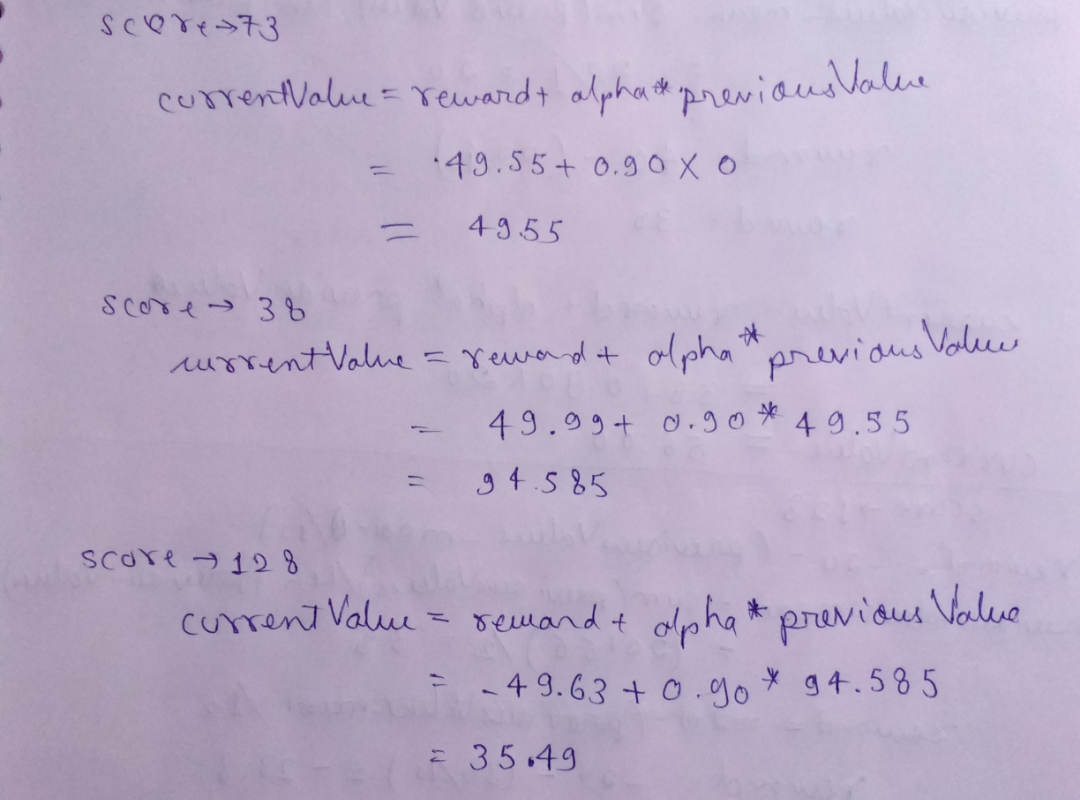

# reward_function_5

### Defining reward function using combination of reward_function_3 and reward_function_4

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('file1.csv')

alpha = 0.10
previousValues = []

def rewardget_combined(score, previousValues):
    # reward function 1
    reward_1 = np.tanh((100 - score) / 10) * 50
    
    # reward function 2
    previousValues_mean = sum(previousValues[-10:]) / len(previousValues[-10:]) if previousValues else 0
    if score >= 0 and score <= 19:
        reward_2 = 50 - (previousValues_mean / 10)
    elif score >= 20 and score <= 39:
        reward_2 = 40 - (previousValues_mean / 10)
    elif score >= 40 and score <= 59:
        reward_2 = 30 - (previousValues_mean / 10)
    elif score >= 60 and score <= 79:
        reward_2 = 20 - (previousValues_mean / 10)
    elif score >= 80 and score <= 99:
        reward_2 = 10 - (previousValues_mean / 10)
    elif score == 100:
        reward_2 = 0 - (previousValues_mean / 10)
    elif score >= 101 and score <= 120:
        reward_2 = -10 - (previousValues_mean / 10)
    elif score >= 121 and score <= 140:
        reward_2 = -20 - (previousValues_mean / 10)
    elif score >= 141 and score <= 160:
        reward_2 = -30 - (previousValues_mean / 10)
    elif score >= 161 and score <= 180:
        reward_2 = -40 - (previousValues_mean / 10)
    elif score >= 181 and score <= 200:
        reward_2 = -50 - (previousValues_mean / 10)
    
    # Combine rewards using a weighted average
    reward = alpha * reward_1 + (1 - alpha) * reward_2
    
    return reward

def valuefind(reward, previousValue, prev_score, current_score):
    if abs(current_score - prev_score) > 100:
        currentValue = 2 * reward + alpha * previousValue
    else:
        currentValue = reward + alpha * previousValue
    return currentValue

currentValues = []
previousValue = 0
prev_score = df.loc[0, 'score']

for i in range(len(df)):
    score = df.loc[i, 'score']
    reward = rewardget_combined(score, previousValues)
    currentValue = valuefind(reward, previousValue, prev_score, score)
    currentValues.append(currentValue)
    previousValues.append(currentValue)
    previousValue = currentValue
    prev_score = score

df['currentValues'] = currentValues

df.head(50)

,Unnamed: 0,query,score,attack,currentValues
0,0,Q1,73,0,22.955037
1,1,Q2,38,0,41.229509
2,2,Q3,128,1,-21.728511
3,3,Q4,179,1,-44.446531
4,4,Q5,173,1,-45.399862
5,5,Q6,91,0,8.894530
6,6,Q7,182,1,-48.533109
7,7,Q8,200,1,-53.734367
8,8,Q9,15,0,97.793737
9,9,Q10,84,0,23.817412
